In [16]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [8]:
from sklearn.datasets import load_wine

data = load_wine()

wine_df = pd.DataFrame(data=data.data ,columns=data.feature_names)
wine_df["class"] = data.target

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


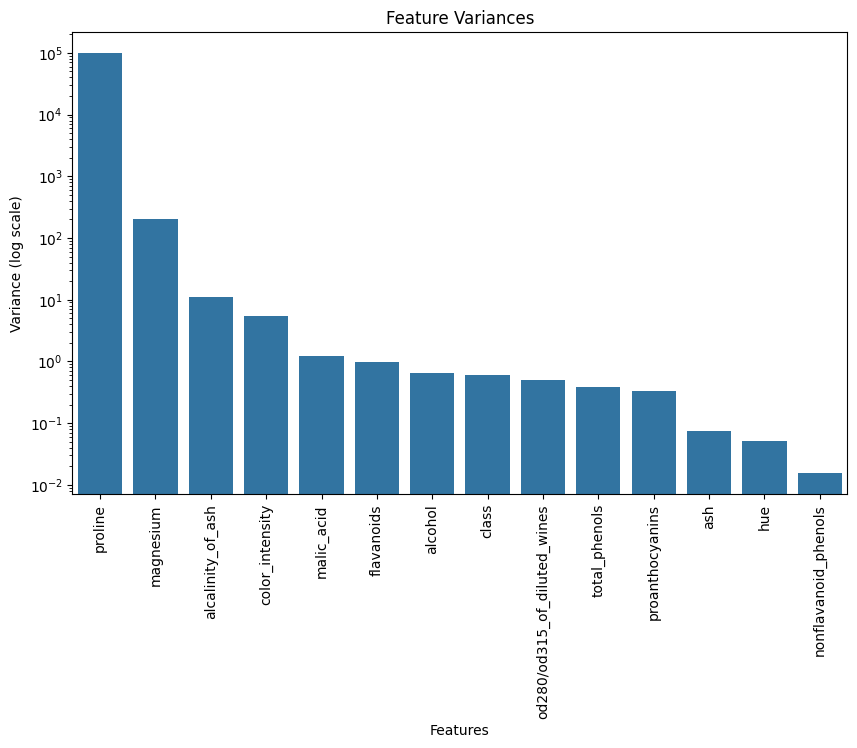

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
filtered_data = selector.fit_transform(wine_df)

variances_score_data = pd.DataFrame({
    "features":wine_df.columns.to_list(),
    "variances":selector.variances_
}).sort_values(by="variances", ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=variances_score_data, x="features", y="variances")
plt.xticks(rotation=90) 
plt.yscale("log")  
plt.xlabel("Features")
plt.ylabel("Variance (log scale)")
plt.title("Feature Variances")
plt.show()

In [27]:
variances_score_data["features"].tolist()

['proline',
 'magnesium',
 'alcalinity_of_ash',
 'color_intensity',
 'malic_acid',
 'flavanoids',
 'alcohol',
 'class',
 'od280/od315_of_diluted_wines',
 'total_phenols',
 'proanthocyanins',
 'ash',
 'hue',
 'nonflavanoid_phenols']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def evaluate_model(model, X, y, ts=0.2):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

    model_pipeline = Pipeline([ 
        # ("scaler", StandardScaler()),
        ("model", model)
    ])

    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)

    print("Accuracy of Testing:",np.mean(y_test == y_pred))
    print("Accuracy of Training:", np.mean(y_train == model_pipeline.predict(X_train)))

In [29]:
from sklearn.linear_model import LogisticRegression

X = wine_df.drop(['hue','nonflavanoid_phenols','class'], axis=1)
y = wine_df["class"]

model = LogisticRegression(random_state=42, max_iter=100)

evaluate_model(model=model, X=X,y=y)

Accuracy of Testing: 0.9722222222222222
Accuracy of Training: 0.9647887323943662


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
